In [176]:
import pandas as pd
import shap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [177]:
# Load dataset
file_path = 'dataset/Construction_Data_PM_Tasks_All_Projects.csv'
df = pd.read_csv(file_path)

In [178]:
# Pilih kolom penting
columns_used = ['Status', 'Type', 'Priority', 'Cause', 'project', 'OverDue']
df = df[columns_used]

In [179]:
# Drop data kosong
df = df.dropna()

In [180]:
# Encode fitur kategori
label_encoders = {}
for col in ['Status', 'Type', 'Priority', 'Cause', 'project']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [181]:
# Target
X = df.drop('OverDue', axis=1)
y = df['OverDue'].map({False: 0, True: 1})  # Biar jadi 0 dan 1


In [182]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [183]:
# Prediksi
y_pred = model.predict(X_test)

In [184]:
# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.9976190476190476

Confusion Matrix:
 [[407   1]
 [  0  12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       0.92      1.00      0.96        12

    accuracy                           1.00       420
   macro avg       0.96      1.00      0.98       420
weighted avg       1.00      1.00      1.00       420



In [185]:
# --- SHAP Explanation ---
# Inisialisasi SHAP Explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

<Figure size 640x480 with 0 Axes>

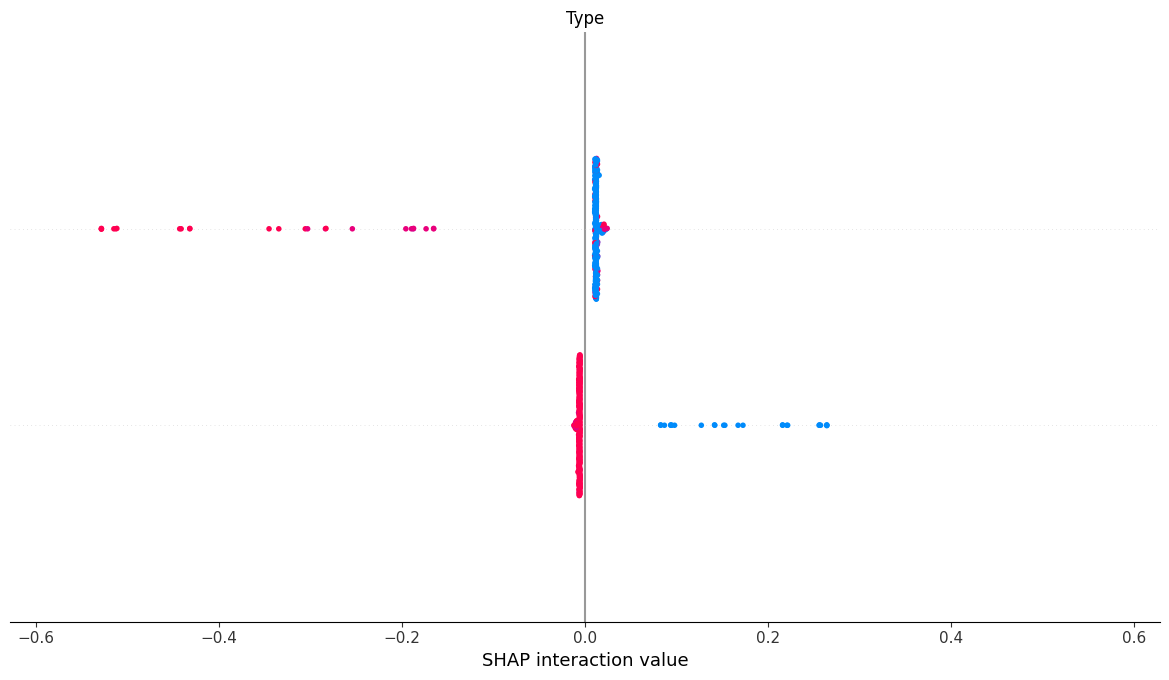

In [186]:
# Global explanation
shap.summary_plot(shap_values, X_test, plot_type="bar")

/home/abx51/.local/lib/python3.13/site-packages/shap/plots/_force_matplotlib.py:107: RuntimeWarning: divide by zero encountered in scalar divide
  feature_contribution = np.abs(float(feature[0]) - pre_val) / np.abs(total_effect)


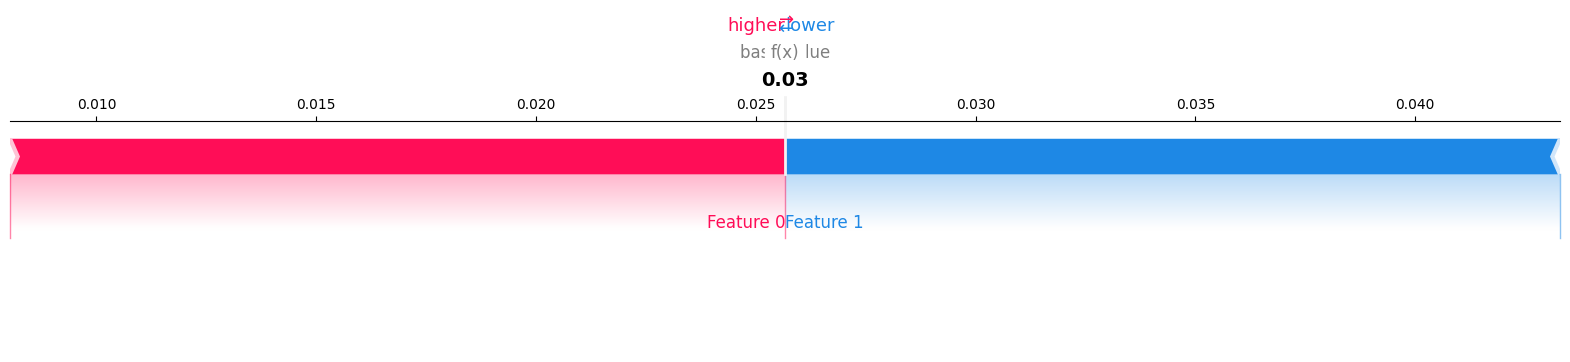

In [187]:
sample_idx = 0  # sample yang mau diliat
class_idx = 1   # index class, biasanya 1 kalau positive class

shap.plots.force(
    explainer.expected_value[class_idx],  # expected value untuk class yg dipilih
    shap_values[class_idx][sample_idx],   # shap value untuk class yg dipilih
    matplotlib=True
)
plt.show()